In [ ]:
# logging

from langchain_teddynote import logging

logging.langsmith("test")

# logging 안하기
# # set_enable=False 로 지정하면 추적을 하지 않습니다.
# logging.langsmith("랭체인 튜토리얼 프로젝트", set_enable=False)

LangSmith 추적을 시작합니다.
[프로젝트명]
test


### 답변생성 방식

- stream: 응답의 청크를 스트리밍합니다. -> 실시간으로 한글자씩 나옴 
    - ```from langchain_teddynote.messages import stream_response``` 후, stream_response(answer)로 가져오기
    - 혹은 아래처럼 for 문으로 한글자씩 불러오기

- invoke: 입력에 대해 체인을 호출합니다. -> 답변 전부 생성

- batch: 입력 목록에 대해 체인을 호출합니다.

In [ ]:
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

load_dotenv()

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o",  # 모델명
)

answer = llm.stream("langchain에서 PromptTemplate 모듈은 왜써? 그냥 string 선언하고 format으로 넣어서 쓰면 되지 않아? 저장 및 유지 관리가 쉬운가?")
for token in answer:
    print(token.content, end="", flush=True)

AIMessage(content='Langchain의 `PromptTemplate` 모듈은 단순히 문자열을 포맷팅하는 것 이상의 기능을 제공합니다. 물론, 기본적인 문자열 포맷팅은 Python의 `format()` 메서드를 사용하여 쉽게 할 수 있지만, `PromptTemplate`은 다음과 같은 추가적인 이점을 제공합니다:\n\n1. **구조화된 관리**: `PromptTemplate`을 사용하면 프롬프트를 더 구조화된 방식으로 관리할 수 있습니다. 이는 특히 복잡한 프롬프트나 여러 변형이 필요한 경우에 유용합니다.\n\n2. **재사용성**: 동일한 프롬프트 구조를 여러 곳에서 재사용할 수 있으며, 필요한 부분만 변경하여 사용할 수 있습니다. 이는 코드의 중복을 줄이고 유지보수를 용이하게 합니다.\n\n3. **유효성 검사**: `PromptTemplate`은 프롬프트에 필요한 모든 변수가 제공되었는지 확인하는 등의 유효성 검사를 수행할 수 있습니다. 이는 런타임 오류를 줄이는 데 도움이 됩니다.\n\n4. **통합 기능**: Langchain의 다른 모듈과 쉽게 통합할 수 있어, 프롬프트 생성과 관련된 다양한 기능을 활용할 수 있습니다. 예를 들어, 프롬프트를 생성하고 이를 기반으로 언어 모델을 호출하는 작업을 더 쉽게 연결할 수 있습니다.\n\n5. **유연성**: 프롬프트 템플릿을 사용하면 다양한 입력에 따라 동적으로 프롬프트를 생성할 수 있어, 더 유연한 애플리케이션을 개발할 수 있습니다.\n\n따라서, 단순한 문자열 포맷팅 이상의 기능이 필요하거나, 프롬프트를 체계적으로 관리하고자 할 때 `PromptTemplate`을 사용하는 것이 유리합니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 384, 'prompt_tokens': 42, 'total_tokens': 426, 'completion_tokens_details': 


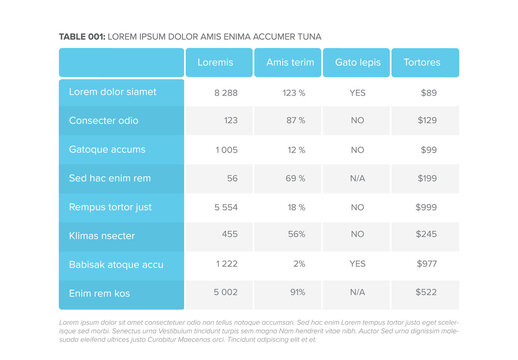

이 이미지는 표 형식의 데이터 테이블을 보여줍니다. 표의 제목은 "TABLE 001: LOREM IPSUM DOLOR AMIS ENIMA ACCUMER TUNA"입니다. 

표는 다섯 개의 열로 구성되어 있으며, 각 열의 제목은 다음과 같습니다:
1. Loremis
2. Amis terim
3. Gáto lepis
4. Tortores

각 행은 다양한 항목을 포함하고 있으며, 숫자, 백분율, "YES"/"NO"와 같은 텍스트, 그리고 달러($) 금액이 포함되어 있습니다. 

표 아래에는 작은 글씨로 "Lorem ipsum" 문구가 포함된 설명 텍스트가 있습니다. 이 텍스트는 일반적으로 디자인 레이아웃을 보여주기 위한 더미 텍스트입니다.

In [13]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

# 멀티모달 객체 생성
multimodal_llm = MultiModal(llm)

# 샘플 이미지 주소(웹사이트로 부터 바로 인식)
IMAGE_URL = "https://t3.ftcdn.net/jpg/03/77/33/96/360_F_377339633_Rtv9I77sSmSNcev8bEcnVxTHrXB4nRJ5.jpg"

system_prompt = """
답변은 무조건 한국어로 대답해.
"""

user_prompt = """
사진의 정보에 대해 자세하게 설명해줘
"""
# 이미지 파일로 부터 질의
answer = multimodal_llm.stream(IMAGE_URL,system_prompt=system_prompt, user_prompt=user_prompt)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)

**LCEL (langchain interface): chain = prompt | model | output_parser**

- prompt: PromptTemplate 으로 설정한 값 넣기

- model: 어떤 모델 사용할 것인지

- output_parser: output format 어케 할 것인지

-> chain으로 답변 생성 시, input 값 넣어서 template 내 변수 값 채워 넣음

In [ ]:
# prompt 정의

from langchain_teddynote.messages import stream_response  # 스트리밍 출력
from langchain_core.prompts import PromptTemplate

# template 정의
template = "{country}의 수도는 어디인가요?"

# from_template 메소드를 이용하여 PromptTemplate 객체 생성
prompt_template = PromptTemplate.from_template(template)
# prompt 생성
prompt = prompt.format(country="대한민국")
prompt

'대한민국의 수도는 어디인가요?'

In [16]:
# chain 설정

from langchain_teddynote.messages import stream_response  # 스트리밍 출력
from langchain_core.prompts import PromptTemplate

# template 정의
template = "{topic}에 대해 설명해줘"

# from_template 메소드를 이용하여 PromptTemplate 객체 생성
prompt = PromptTemplate.from_template(template)

model = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

chain = prompt | model

input = {"topic": "성공하는 방법"}
chain.invoke(input)

AIMessage(content='성공하는 방법은 개인의 목표, 가치관, 그리고 상황에 따라 다를 수 있지만, 일반적으로 다음과 같은 요소들이 성공에 기여할 수 있습니다:\n\n1. **명확한 목표 설정**: 무엇을 이루고 싶은지 명확히 정의하는 것이 중요합니다. 구체적이고 측정 가능한 목표를 설정하면 그 목표를 향해 나아가는 데 도움이 됩니다.\n\n2. **계획 수립**: 목표를 달성하기 위한 구체적인 계획을 세우세요. 단기 및 장기 계획을 모두 고려하고, 필요한 자원과 단계를 파악하세요.\n\n3. **지속적인 학습**: 새로운 기술과 지식을 습득하는 것은 성공에 필수적입니다. 자기 계발을 위해 책을 읽거나, 강의를 듣거나, 새로운 경험을 쌓는 것을 추천합니다.\n\n4. **끈기와 인내**: 성공은 종종 시간이 걸리고 도전이 따릅니다. 어려운 상황에서도 포기하지 않고 계속해서 노력하는 것이 중요합니다.\n\n5. **네트워킹**: 다른 사람들과의 관계를 구축하고 유지하는 것은 많은 기회를 가져다 줄 수 있습니다. 멘토를 찾거나, 같은 목표를 가진 사람들과 교류하세요.\n\n6. **자기 관리**: 건강한 생활 습관을 유지하고 스트레스를 관리하는 것이 중요합니다. 신체적, 정신적 건강은 성공을 지속하는 데 필수적입니다.\n\n7. **적응력**: 변화하는 환경에 빠르게 적응할 수 있는 능력은 성공에 큰 도움이 됩니다. 유연한 사고와 문제 해결 능력을 기르세요.\n\n8. **긍정적인 태도**: 긍정적인 마인드는 도전적인 상황에서도 희망을 잃지 않게 하고, 다른 사람들에게도 긍정적인 영향을 미칩니다.\n\n이러한 요소들을 고려하면서 자신의 상황에 맞게 조정하고 적용해 나가면 성공에 한 걸음 더 가까워질 수 있을 것입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 431, 'prompt_tokens': 16, 'total_token

In [ ]:
# 여러 input 동시에 처리 -> 답변도 list로 받음

chain.batch([{"topic": "ChatGPT"}, {"topic": "Instagram"}])

[AIMessage(content='ChatGPT는 OpenAI에 의해 개발된 대화형 인공지능 모델입니다. 이 모델은 자연어 처리(NLP) 기술을 기반으로 하여 사람과 유사한 방식으로 대화를 할 수 있도록 설계되었습니다. ChatGPT는 다양한 주제에 대해 질문에 답변하고, 정보를 제공하며, 사용자와 상호작용할 수 있습니다.\n\n주요 특징은 다음과 같습니다:\n\n1. **대화 능력**: ChatGPT는 사용자의 입력을 이해하고 적절한 응답을 생성할 수 있습니다. 이는 대화형 AI 애플리케이션에서 매우 유용합니다.\n\n2. **다양한 주제 처리**: 일반적인 상식부터 전문적인 지식까지 다양한 주제에 대해 대화할 수 있습니다.\n\n3. **연속적 대화**: 이전 대화 내용을 기억하여 맥락에 맞는 대화를 이어갈 수 있습니다.\n\n4. **사용자 맞춤형 응답**: 사용자의 요구에 맞춰 응답을 조정할 수 있으며, 다양한 스타일과 톤으로 대화할 수 있습니다.\n\n5. **학습과 개선**: 대량의 텍스트 데이터를 기반으로 학습되었으며, 지속적인 업데이트와 개선을 통해 성능이 향상됩니다.\n\nChatGPT는 고객 서비스, 교육, 콘텐츠 생성 등 다양한 분야에서 활용될 수 있으며, 사용자 경험을 향상시키기 위한 도구로 사용되고 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 302, 'prompt_tokens': 14, 'total_tokens': 316, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_n

In [18]:
# max_concurrency 통해 동시처리 batch 수 지정

chain.batch(
    [
        {"topic": "ChatGPT"},
        {"topic": "Instagram"},
        {"topic": "멀티모달"},
        {"topic": "프로그래밍"},
        {"topic": "머신러닝"},
    ],
    config={"max_concurrency": 3},
)

[AIMessage(content='ChatGPT는 OpenAI에 의해 개발된 대화형 인공지능 모델입니다. 이 모델은 자연어 처리(NLP) 기술을 기반으로 하여 사람과 유사한 방식으로 대화를 할 수 있도록 설계되었습니다. ChatGPT는 대량의 텍스트 데이터를 학습하여 다양한 주제에 대해 정보를 제공하고 질문에 답변할 수 있습니다.\n\n주요 특징은 다음과 같습니다:\n\n1. **대화 능력**: ChatGPT는 사용자의 질문에 응답하고 대화를 이어나갈 수 있는 능력을 갖추고 있습니다. 이는 사용자와의 상호작용을 자연스럽고 유익하게 만듭니다.\n\n2. **다양한 주제**: 과학, 역사, 기술, 문화 등 다양한 주제에 대해 정보를 제공할 수 있습니다. 이는 모델이 광범위한 데이터로 학습되었기 때문입니다.\n\n3. **지속적인 개선**: OpenAI는 사용자 피드백과 새로운 기술을 바탕으로 모델을 지속적으로 개선하고 있습니다. 이를 통해 ChatGPT는 점점 더 정확하고 유용한 정보를 제공할 수 있게 됩니다.\n\n4. **응용 분야**: 고객 서비스, 교육, 콘텐츠 생성 등 다양한 분야에서 활용될 수 있습니다. 기업과 개인 모두 ChatGPT를 통해 효율성을 높이고 새로운 가능성을 탐색할 수 있습니다.\n\nChatGPT는 이러한 기능을 통해 사용자에게 유용한 도구로 자리잡고 있으며, 인공지능과 인간의 상호작용을 더욱 발전시키고 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 320, 'prompt_tokens': 14, 'total_tokens': 334, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens

In [29]:
# output_parser와 함께 chain 정의

from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_teddynote.messages import stream_response

template = """
당신은 영어를 가르치는 10년차 영어 선생님입니다. 상황에 [FORMAT]에 영어 회화를 작성해 주세요.

상황:
{question}

FORMAT:
- 영어 회화:
- 한글 해석:
"""

# 프롬프트 템플릿을 이용하여 프롬프트를 생성합니다.
prompt = PromptTemplate.from_template(template)

# ChatOpenAI 챗모델을 초기화합니다.
model = ChatOpenAI(model_name="gpt-4-turbo")

# 문자열 출력 파서를 초기화합니다.
output_parser = StrOutputParser()

chain = prompt | model | output_parser

answer = chain.stream({"question": "저는 식당에 가서 음식을 주문하고 싶어요"})
stream_response(answer)

영어 회화:
- Hello! I’d like to order some food, please. Could I see the menu?
- Sure, I'll have the steak and a side of mashed potatoes.
- Thank you!

한글 해석:
- 안녕하세요! 음식을 주문하고 싶어요. 메뉴판 좀 볼 수 있을까요?
- 네, 스테이크와 매시드 포테이토를 주문할게요.
- 감사합니다!

### async 비동기 method

- astream: 비동기적으로 응답의 청크를 스트리밍합니다.

- ainvoke: 비동기적으로 입력에 대해 체인을 호출합니다.

- abatch: 비동기적으로 입력 목록에 대해 체인을 호출합니다.

- astream_log: 최종 응답뿐만 아니라 발생하는 중간 단계를 스트리밍합니다.

In [19]:
# 비동기 스트림을 사용하여 'YouTube' 토픽의 메시지를 처리합니다.
async for token in chain.astream({"topic": "YouTube"}):
    # 메시지 내용을 출력합니다. 줄바꿈 없이 바로 출력하고 버퍼를 비웁니다.
    print(token, end="", flush=True)

content='' additional_kwargs={} response_metadata={} id='run-db0e5e27-2d1e-40c0-9a37-0b2da86a4500'content='You' additional_kwargs={} response_metadata={} id='run-db0e5e27-2d1e-40c0-9a37-0b2da86a4500'content='Tube' additional_kwargs={} response_metadata={} id='run-db0e5e27-2d1e-40c0-9a37-0b2da86a4500'content='는' additional_kwargs={} response_metadata={} id='run-db0e5e27-2d1e-40c0-9a37-0b2da86a4500'content=' 사용' additional_kwargs={} response_metadata={} id='run-db0e5e27-2d1e-40c0-9a37-0b2da86a4500'content='자가' additional_kwargs={} response_metadata={} id='run-db0e5e27-2d1e-40c0-9a37-0b2da86a4500'content=' 동' additional_kwargs={} response_metadata={} id='run-db0e5e27-2d1e-40c0-9a37-0b2da86a4500'content='영' additional_kwargs={} response_metadata={} id='run-db0e5e27-2d1e-40c0-9a37-0b2da86a4500'content='상을' additional_kwargs={} response_metadata={} id='run-db0e5e27-2d1e-40c0-9a37-0b2da86a4500'content=' 업' additional_kwargs={} response_metadata={} id='run-db0e5e27-2d1e-40c0-9a37-0b2da86a4500'

In [20]:
my_process = chain.ainvoke({"topic": "NVDA"})
await my_process

AIMessage(content='NVDA는 NVIDIA Corporation의 주식 티커 심볼입니다. NVIDIA는 그래픽 처리 장치(GPU)와 인공지능(AI) 기술 분야에서 세계적으로 선도적인 기업입니다. 1993년에 설립된 이 회사는 주로 고성능 그래픽 카드, 데이터 센터 솔루션, 자율주행차 기술, 그리고 AI 및 머신러닝을 위한 하드웨어 및 소프트웨어 솔루션을 개발하고 있습니다.\n\nNVIDIA의 GPU는 게임 산업에서 널리 사용되며, 최근에는 AI와 딥러닝 분야에서도 중요한 역할을 하고 있습니다. 이 회사의 기술은 데이터 센터, 자율주행차, 로봇 공학, 의료 영상 처리 등 다양한 산업에 적용되고 있습니다.\n\nNVIDIA는 또한 CUDA라는 병렬 컴퓨팅 플랫폼과 프로그래밍 모델을 개발하여 연구자와 개발자들이 GPU의 성능을 활용할 수 있도록 지원하고 있습니다. 이러한 기술 혁신 덕분에 NVIDIA는 AI 및 데이터 과학 분야에서 중요한 파트너로 자리잡고 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 227, 'prompt_tokens': 14, 'total_tokens': 241, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_9d50cd990b', 'finish_reason': 'stop', 'logprobs': None}, id='run-1e34f32c-5c42-459d-a332-0ffc1

### 병렬처리
from langchain_core.runnables import RunnableParallel



In [21]:
from langchain_core.runnables import RunnableParallel

# {country} 의 수도를 물어보는 체인을 생성합니다.
chain1 = (
    PromptTemplate.from_template("{country} 의 수도는 어디야?")
    | model
    | StrOutputParser()
)

# {country} 의 면적을 물어보는 체인을 생성합니다.
chain2 = (
    PromptTemplate.from_template("{country} 의 면적은 얼마야?")
    | model
    | StrOutputParser()
)

# 위의 2개 체인을 동시에 생성하는 병렬 실행 체인을 생성합니다.
combined = RunnableParallel(capital=chain1, area=chain2)

In [22]:
combined.invoke({"country": "대한민국"})

{'capital': '대한민국의 수도는 서울입니다.',
 'area': '대한민국의 면적은 약 100,210 평방 킬로미터입니다. 이 면적은 남한만을 기준으로 하며, 북한을 포함한 한반도의 전체 면적은 약 220,000 평방 킬로미터입니다.'}

### Runnable

- RunnablePassthrough:  입력을 변경하지 않거나 추가 키를 더하여 전달할 수 있습니다.

    - 단독 호출: 단순히 입력을 받아 그대로 전달합니다.

    - RunnablePassthrough.assign(...) 방식으로 호출: 입력을 받아 assign 함수에 전달된 추가 인수를 추가합니다.

In [23]:
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI


# prompt 와 llm 을 생성합니다.
prompt = PromptTemplate.from_template("{num} 의 10배는?")
llm = ChatOpenAI(temperature=0)

# chain 을 생성합니다.
chain = prompt | llm

# chain 을 실행합니다.
chain.invoke({"num": 5})

AIMessage(content='50입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 16, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-b354296a-caec-4bf8-9944-431f77a4595a-0', usage_metadata={'input_tokens': 16, 'output_tokens': 3, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
# 값이 하나라면 dict 형식 아니어도 가능
chain.invoke(5)

AIMessage(content='50입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 16, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-19adc551-5585-4a50-890c-65febf4d8d2d-0', usage_metadata={'input_tokens': 16, 'output_tokens': 3, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
# runnable chain 만들기

from langchain_core.runnables import RunnablePassthrough

# runnable
RunnablePassthrough().invoke({"num": 10})

{'num': 10}

In [26]:
# 입력 키: num, 할당(assign) 키: new_num
(RunnablePassthrough.assign(new_num=lambda x: x["num"] * 3)).invoke({"num": 1})

{'num': 1, 'new_num': 3}

In [27]:
from langchain_core.runnables import RunnableParallel

# RunnableParallel 인스턴스를 생성합니다. 이 인스턴스는 여러 Runnable 인스턴스를 병렬로 실행할 수 있습니다.
runnable = RunnableParallel(
    # RunnablePassthrough 인스턴스를 'passed' 키워드 인자로 전달합니다. 이는 입력된 데이터를 그대로 통과시키는 역할을 합니다.
    passed=RunnablePassthrough(),
    # 'extra' 키워드 인자로 RunnablePassthrough.assign을 사용하여, 'mult' 람다 함수를 할당합니다. 이 함수는 입력된 딕셔너리의 'num' 키에 해당하는 값을 3배로 증가시킵니다.
    extra=RunnablePassthrough.assign(mult=lambda x: x["num"] * 3),
    # 'modified' 키워드 인자로 람다 함수를 전달합니다. 이 함수는 입력된 딕셔너리의 'num' 키에 해당하는 값에 1을 더합니다.
    modified=lambda x: x["num"] + 1,
)

# runnable 인스턴스에 {'num': 1} 딕셔너리를 입력으로 전달하여 invoke 메소드를 호출합니다.
runnable.invoke({"num": 1})

{'passed': {'num': 1}, 'extra': {'num': 1, 'mult': 3}, 'modified': 2}

In [ ]:
# RunnableLambda로 함수 넘겨줄 수 있음.

from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from datetime import datetime


def get_today(a):
    # 오늘 날짜를 가져오기
    return datetime.today().strftime("%b-%d")


from langchain_core.runnables import RunnableLambda, RunnablePassthrough

# prompt 와 llm 을 생성합니다.
prompt = PromptTemplate.from_template(
    "{today} 가 생일인 유명인 {n} 명을 나열하세요. 생년월일을 표기해 주세요."
)
llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

# chain 을 생성합니다.
chain = (
    {"today": RunnableLambda(get_today), "n": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

# 출력
print(chain.invoke(3))

12월 5일이 생일인 유명인 세 명은 다음과 같습니다.

1. 월트 디즈니 (Walt Disney) - 1901년 12월 5일
2. 프랭키 무니즈 (Frankie Muniz) - 1985년 12월 5일
3. 패트리샤 카아스 (Patricia Kaas) - 1966년 12월 5일

이들은 각각 애니메이션, 연기, 음악 분야에서 잘 알려진 인물들입니다.


In [ ]:
# itemgetter 통해 특정 key 추출

from operator import itemgetter

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableLambda
from langchain_openai import ChatOpenAI


# 문장의 길이를 반환하는 함수입니다.
def length_function(text):
    return len(text)


# 두 문장의 길이를 곱한 값을 반환하는 함수입니다.
def _multiple_length_function(text1, text2):
    return len(text1) * len(text2)


# _multiple_length_function 함수를 사용하여 두 문장의 길이를 곱한 값을 반환하는 함수입니다.
def multiple_length_function(_dict):
    return _multiple_length_function(_dict["text1"], _dict["text2"])


prompt = ChatPromptTemplate.from_template("{a} + {b} 는 무엇인가요?")
model = ChatOpenAI()

chain1 = prompt | model

chain = (
    {
        "a": itemgetter("word1") | RunnableLambda(length_function),
        "b": {"text1": itemgetter("word1"), "text2": itemgetter("word2")}
        | RunnableLambda(multiple_length_function),
    }
    | prompt
    | model
)

# itemgetter로 word1 인 key 값인 hello 가져오고, 거기에 RunnableLambda로 함수 적용해서 길이 반환
chain.invoke({"word1": "hello", "word2": "world"})

AIMessage(content='5 + 25 = 30', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 22, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-61b4beab-ecd4-48b6-b214-f570312a1327-0', usage_metadata={'input_tokens': 22, 'output_tokens': 7, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})